Importing Pandas, NUmpy, Matplotlib, Seaborn and Warnings Library.

I first selected the kernel to the existing kernel --> selected the anaconda environment --> then executed the below cell. This caused a pop-up to appear asking to install ipykernel. installed it and then proceeded with it. It took some time for the installation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import data into a Pandas Dataframe

In [4]:
df = pd.read_csv(r'C:\Users\justi\OneDrive\STUDY\Python\MLProject1\Data\StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
# Number of unique values in each column.
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education:  ", end="")
print(df['parental level of education'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [26]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))
print(f'We have {len(numeric_features)}')


We have 5 numerical features: ['math score', 'reading score', 'writing score', 'Total_score', 'Average']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
We have 5


In [22]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
# Find the number of students who achieved full marks in the subjects
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
maths_full = df[df['math score'] == 100]['Average'].count()
print(f'The number of students with full marks in Reading: {reading_full}')
print(f'The number of students with full marks in Writing is: {writing_full}')
print(f'The number of students with full marks in Maths is: {maths_full}')

The number of students with full marks in Reading: 17
The number of students with full marks in Writing is: 14
The number of students with full marks in Maths is: 7


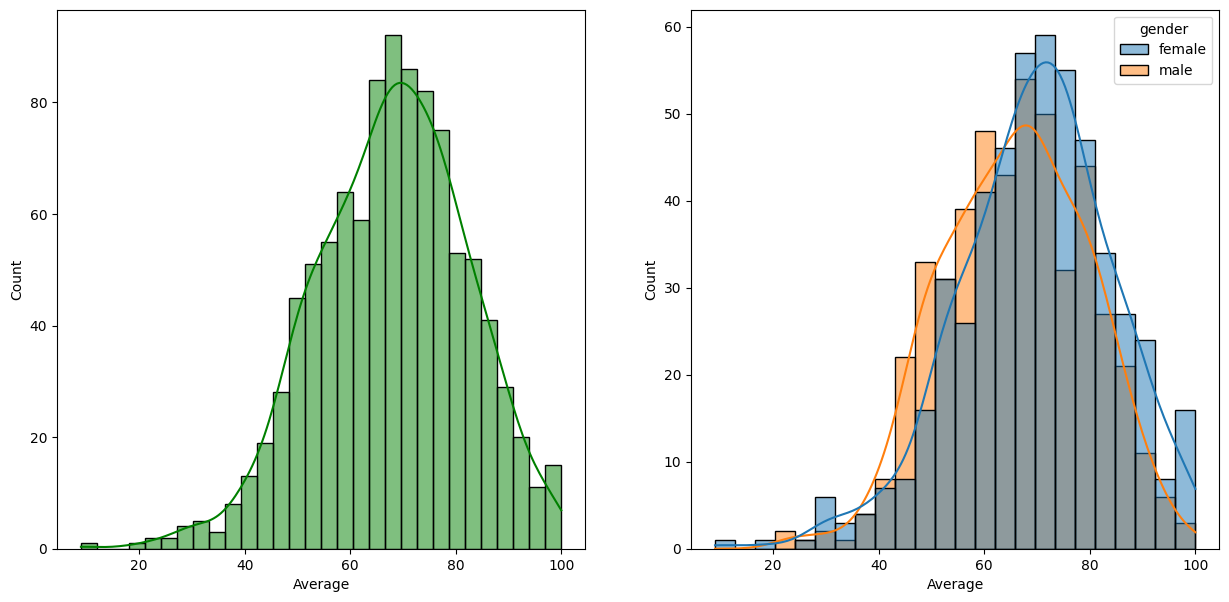

In [37]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average', kde=True,hue='gender')
plt.show()

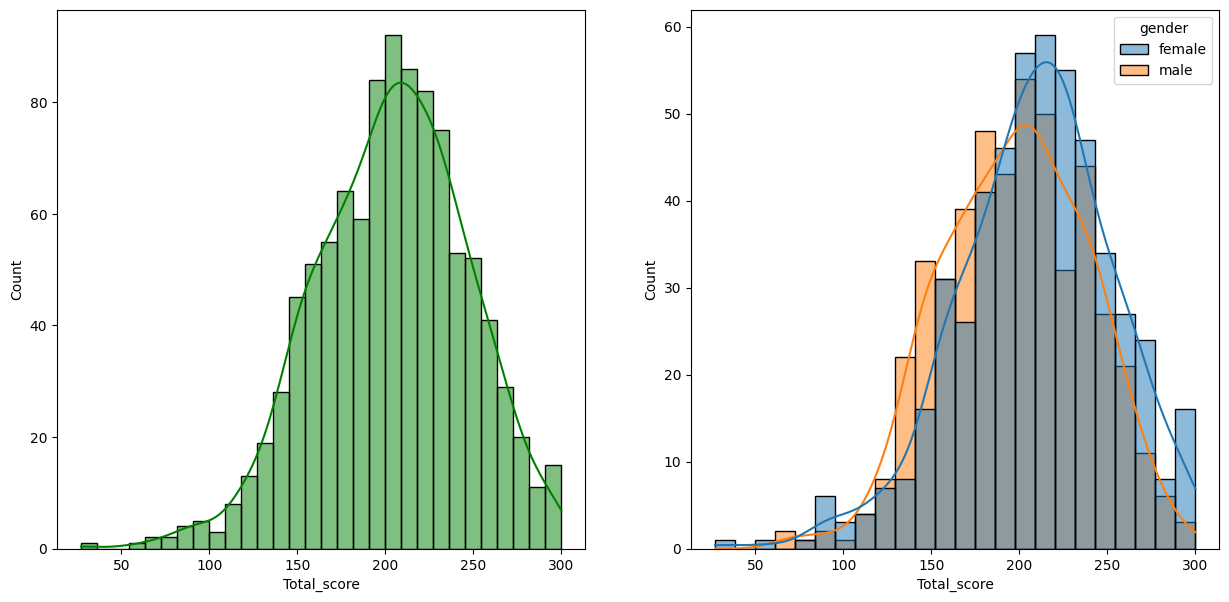

In [40]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score', kde=True,hue='gender')
plt.show()